In [9]:
import torch
import torchvision.datasets as datasets
from tqdm import tqdm
from torch import nn
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import sys
import os
import matplotlib.pyplot as plt

# adding '../src/model/' to sys.path
sys.path.append(os.path.abspath('../src/model/'))

from model import SuperResolution

In [10]:
# Initialize some constants
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
INPUT_DIM = 1000 # input image is going to be resized to this size
DOWNGRADE_FACTOR = 10 # by how much the image resolution is going to be reduced (downgrade_factor = 10 ==> img.shape /= 10)
NUM_EPOCHS = 20
BATCH_SIZE = 1

# loading the dataset
data_path = '../data/dataset/test_set' # setting path
# sequence of transformations to be done
transform = transforms.Compose([transforms.Resize((INPUT_DIM, INPUT_DIM)),   # sequence of transformations to be done
                                transforms.Grayscale(num_output_channels=1), # on each image (resize, greyscale,
                                transforms.ToTensor()])                      # convert to tensor)

dataset = datasets.ImageFolder(root=data_path, transform=transform) # read data from folder

# if starting epoch is not 0, load from last trained model
model = SuperResolution().to(DEVICE)
model.load_state_dict(torch.load(f'../models/model'))

<All keys matched successfully>

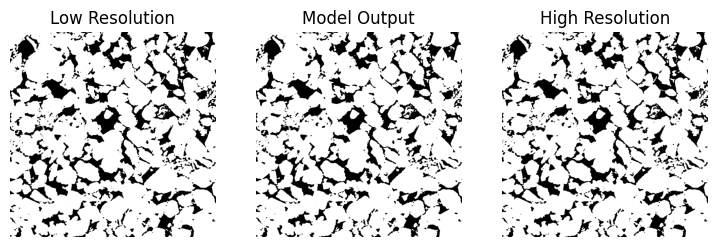

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))  # figsize ajustada para 3 imagens lado a lado
titles = ["Low Resolution", "Model Output", "High Resolution"]
images = [x.cpu()[0][0], x.cpu()[0][0], x.cpu()[0][0]]

for i in range(3):
    axs[i].imshow(images[i], cmap='gray')
    axs[i].set_title(titles[i])
    axs[i].axis('off')

plt.show()